In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels
from heatmapannot import heatmapannot


%load_ext autoreload
%autoreload 2

TransformedBbox(
    Bbox(x0=0.0, y0=0.0, x1=11.0, y1=9.0),
    Affine2D().scale(72.0))
[[-6.08050037 30.30463576]
 [36.98057395 -4.13245033]]
TransformedBbox(
    Bbox(x0=0.0, y0=0.0, x1=11.0, y1=9.0),
    Affine2D().scale(72.0))
[[-6.80412068 30.30463576]
 [37.22825607 -4.13245033]]
TransformedBbox(
    Bbox(x0=0.0, y0=0.0, x1=11.0, y1=9.0),
    Affine2D().scale(72.0))
[[-6.80412068 31.00397351]
 [37.22825607 -4.22781457]]


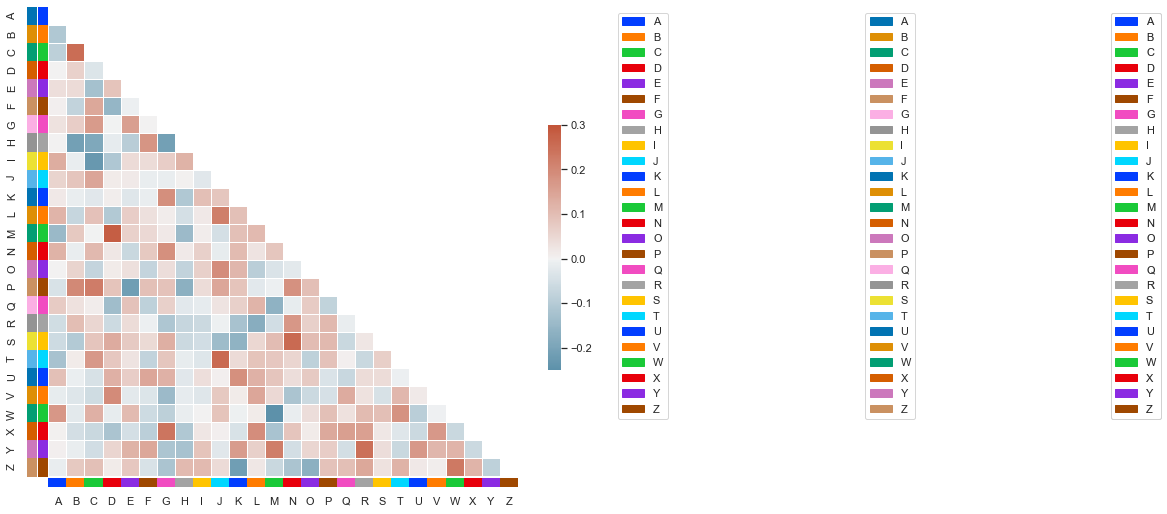

In [162]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
snsFig = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
           ax = ax)

#snsFig.add_patch(Rectangle([-1, 2], 1, 1, color="green", clip_on=False))
#snsFig.set_xlim(-1, 26)
heatmapannot.AddHeatmapAnnot(row_palettes=["bright", "colorblind"], col_palettes=["bright"], ax=snsFig)
#heatmapannot.AddHeatmapAnnot(row_palettes=["bright"], ax=snsFig)

plt.show()

In [3]:
data_url = 'http://bit.ly/2cLzoxH'
gapminder = pd.read_csv(data_url)
print(gapminder.head(3))

       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710


17.552419354838708 12.0 6.0 4.0
24.042450716845877 12.0 6.0 4.0


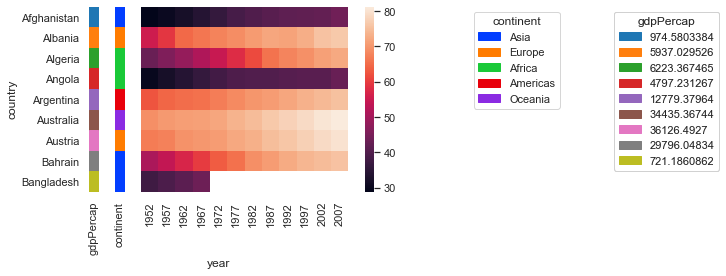

In [224]:
short_df = gapminder.head(100)
fig, ax = plt.subplots(figsize=(6,4))
heatmap_data = pd.pivot_table(short_df, values='lifeExp', 
                     index=['country'], 
                     columns='year')
snsFig = sns.heatmap(heatmap_data)
heatmapannot.AddHeatmapAnnot(data=short_df, heatmap_row="country", row_features = ["continent", "gdpPercap"],
                            row_palettes=["bright", "tab10"], gap=1, ax=snsFig)
plt.tight_layout()

In [157]:
fig.bbox.transformed(ax.transData.inverted()).get_points()

array([[-8.21631515, 12.93312597],
       [16.3645209 , -0.50388802]])

In [180]:
for a in ax.artists:
    print(a.get_tightbbox(renderer = fig.canvas.get_renderer()).transformed(snsFig.transData.inverted()).get_points())
    

[[15.45933939  4.94695068]
 [20.40871811  0.2672714 ]]
[[23.27540342  7.9598283 ]
 [29.3233592   0.2672714 ]]


In [ ]:
b

In [111]:
fig.get_boundbox(renderer = fig.canvas.get_renderer()).transformed(snsFig.transData.inverted())

AttributeError: 'Figure' object has no attribute 'get_boundbox'

In [126]:
fig.bbox.transformed(snsFig.transData.inverted()).get_points()

array([[-4.22177419, 10.49006623],
       [17.55241935, -1.43046358]])

In [62]:
l.get_tightbbox(fig.canvas.get_renderer()).transformed(snsFig.transData.inverted())

Bbox([[21.17002688172043, 3.2698675496688754], [29.801579301075265, 0.10347682119205359]])

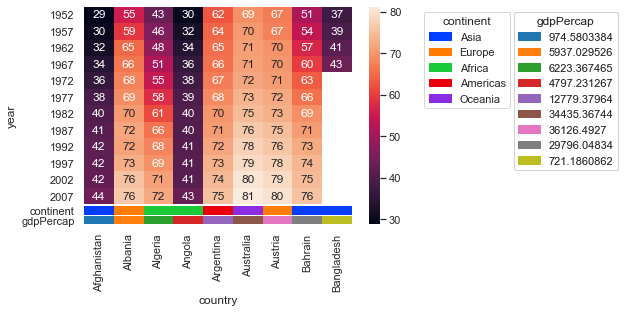

In [155]:
short_df = gapminder.head(100)
heatmap_data = pd.pivot_table(short_df, values='lifeExp', 
                     index=['year'], 
                     columns='country')
snsFig = sns.heatmap(heatmap_data, annot=True)
heatmapannot.AddHeatmapAnnot(data=short_df, heatmap_col="country", col_features = ["continent", "gdpPercap"],
                            col_palettes=["bright", "tab10"])

In [153]:
short_df

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
95,Bahrain,2007,708573.0,Asia,75.635,29796.048340
96,Bangladesh,1952,46886859.0,Asia,37.484,684.244172
97,Bangladesh,1957,51365468.0,Asia,39.348,661.637458
98,Bangladesh,1962,56839289.0,Asia,41.216,686.341554
